<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%973.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ИДЗ 3. Нечёткие модели.
####Вариант 11.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib inline

In [3]:
def f(t):
  return ((t - 9) * (t - 13) * (t - 15))

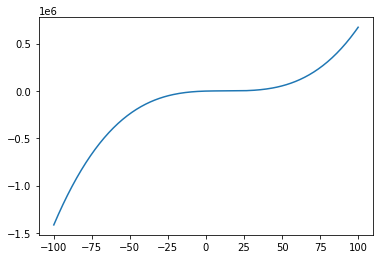

In [23]:
t = np.linspace(-100, 100, num = 200)
f_t = f(t)
plt.plot(t, f_t)